# 1. Problem

We have a set of data consist of 4 categories data which are glioma tumor, meningioma_tumor, normal and pituitary_tumor. Can we classify accurately with suitable deep learning model?

# 2. Data


Introduction: This enhanced dataset builds upon the "Uncovering Knowledge: A Clean Brain Tumor Dataset for Advanced Medical Research." It has undergone significant improvements while acknowledging the original authors' contributions.

Data Source: The initial data was sourced from the brain tumor classification MRI dataset, which is accessible at this link, and was generously shared by https://www.kaggle.com/sartajbhuvaji.

Enhancements Made:

Removal of Redundant Data: Redundant data, including data augmentations like Salt and Pepper noise and geometric transformations, have been removed to ensure sample consistency.

Image Normalization: Images have been normalized using their grayscale histograms, enhancing image quality and comparability.

Resizing with Aspect Ratio Preservation: All images have been resized to a consistent 256 x 256-pixel size while preserving the original aspect ratio, ensuring uniform and detailed images.

Acknowledgment to Original Authors: We extend our sincere gratitude to the original authors of the "Uncovering Knowledge" dataset for their invaluable work in data collection and initial cleaning, which laid the foundation for this enhanced version.

License: This dataset is released under the CC0 license, making it accessible to the medical research community and promoting collaboration and innovation.


data source: https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256/data

# 3. Evaluation

We target as high as possible in accuracy metrics

# 4. Features

The feature extraction of the images is done by the deep learning model

### Data preparation

In [1]:
#import some libraries

import numpy as np
import os
import cv2
import PIL

import tensorflow as tf
from tensorflow import keras

In [2]:
data_dir = ".\\Data"

In [3]:
data_dir

'.\\Data'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Data')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('Data/glioma_tumor/G_1.jpg'),
 WindowsPath('Data/glioma_tumor/G_10.jpg'),
 WindowsPath('Data/glioma_tumor/G_100.jpg'),
 WindowsPath('Data/glioma_tumor/G_101.jpg'),
 WindowsPath('Data/glioma_tumor/G_102.jpg'),
 WindowsPath('Data/glioma_tumor/G_103.jpg'),
 WindowsPath('Data/glioma_tumor/G_104.jpg'),
 WindowsPath('Data/glioma_tumor/G_105.jpg'),
 WindowsPath('Data/glioma_tumor/G_106.jpg'),
 WindowsPath('Data/glioma_tumor/G_107.jpg'),
 WindowsPath('Data/glioma_tumor/G_108.jpg'),
 WindowsPath('Data/glioma_tumor/G_109.jpg'),
 WindowsPath('Data/glioma_tumor/G_11.jpg'),
 WindowsPath('Data/glioma_tumor/G_110.jpg'),
 WindowsPath('Data/glioma_tumor/G_111.jpg'),
 WindowsPath('Data/glioma_tumor/G_112.jpg'),
 WindowsPath('Data/glioma_tumor/G_113.jpg'),
 WindowsPath('Data/glioma_tumor/G_114.jpg'),
 WindowsPath('Data/glioma_tumor/G_115.jpg'),
 WindowsPath('Data/glioma_tumor/G_116.jpg'),
 WindowsPath('Data/glioma_tumor/G_117.jpg'),
 WindowsPath('Data/glioma_tumor/G_118.jpg'),
 WindowsPath('

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3096

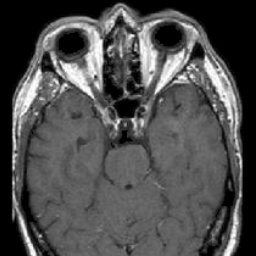

In [7]:
# let's show some image

normal = list(data_dir.glob('normal/*'))

# normal brain
PIL.Image.open(str(normal[0]))

In [8]:
brain_tumor_data = {
    'glioma_tumor': list(data_dir.glob('glioma_tumor/*'))  ,
    'meningioma_tumor': list(data_dir.glob('meningioma_tumor/*')),
    'normal': list(data_dir.glob('normal/*')),
    'pituitary_tumor': list(data_dir.glob('pituitary_tumor/*'))
}

In [9]:
brain_tumor_label = {
    'glioma_tumor': 0,
    'meningioma_tumor': 1,
    'normal': 2,
    'pituitary_tumor': 3
}

In [10]:
img = cv2.imread(str(brain_tumor_data['glioma_tumor'][0]))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
img.shape

(256, 256, 3)

In [12]:
X, y = [] , []

for brain_name,images in brain_tumor_data.items():
    print(brain_name)
    print(len(images))

glioma_tumor
901
meningioma_tumor
913
normal
438
pituitary_tumor
844


In [13]:
for brain_name,images in brain_tumor_data.items():
    for image in images:
        img = cv2.imread(str(image))
        X.append(img)
        y.append(brain_tumor_label[brain_name])

In [14]:
X[0].shape

(256, 256, 3)

In [15]:
y[0]

0

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X_scaled = X/255 

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [19]:
len(X_train),len(X_test)

(2476, 620)

In [20]:
number_of_classes = 4 

model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(number_of_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )


model.fit(X_train,y_train,epochs=10)

Epoch 1/10
78/78 [==============================] - 42s 520ms/step - loss: 1.2247 - accuracy: 0.4285
Epoch 2/10
78/78 [==============================] - 40s 508ms/step - loss: 0.8291 - accuracy: 0.6410
Epoch 3/10
78/78 [==============================] - 40s 514ms/step - loss: 0.4840 - accuracy: 0.8126
Epoch 4/10
78/78 [==============================] - 41s 524ms/step - loss: 0.2884 - accuracy: 0.8930
Epoch 5/10
78/78 [==============================] - 41s 525ms/step - loss: 0.1319 - accuracy: 0.9592
Epoch 6/10
78/78 [==============================] - 41s 526ms/step - loss: 0.0774 - accuracy: 0.9774
Epoch 7/10
78/78 [==============================] - 42s 538ms/step - loss: 0.0361 - accuracy: 0.9891
Epoch 8/10
78/78 [==============================] - 42s 544ms/step - loss: 0.0185 - accuracy: 0.9960
Epoch 9/10
78/78 [==============================] - 42s 544ms/step - loss: 0.0094 - accuracy: 0.9980
Epoch 10/10
78/78 [==============================] - 43s 545ms/step - loss: 0.0103 - accura

In [21]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 2s 96ms/step - loss: 0.8176 - accuracy: 0.8258


[0.8175674676895142, 0.8258064389228821]

In [22]:
model.evaluate(X_train,y_train)

78/78 [==============================] - 9s 109ms/step - loss: 0.0069 - accuracy: 0.9984


[0.006864627823233604, 0.9983844757080078]

Our train score is 0.9984 , test score is 0.8258 . Can we get better score for test set?

In [23]:
y_preds = model.predict(X_test)
y_preds

20/20 [==============================] - 2s 100ms/step


array([[5.6226741e-05, 7.1936734e-06, 9.9977249e-01, 1.6403828e-04],
       [9.9600405e-02, 9.0036404e-01, 1.9969684e-05, 1.5600328e-05],
       [2.3255025e-03, 9.9767452e-01, 3.0484135e-18, 2.2821797e-19],
       ...,
       [1.1596372e-02, 9.8840362e-01, 5.7774363e-09, 1.0556411e-09],
       [5.9721090e-09, 2.8663708e-05, 1.0336456e-05, 9.9996102e-01],
       [8.6569268e-01, 1.3430724e-01, 3.2132474e-09, 1.0651475e-07]],
      dtype=float32)

In [24]:
np.argmax(y_preds[0])

2

In [25]:
y_preds_classes = np.argmax(y_preds,axis=1)
y_preds_classes

array([2, 1, 1, 3, 3, 2, 3, 0, 3, 1, 3, 0, 2, 1, 0, 1, 3, 3, 1, 3, 0, 2,
       1, 3, 3, 0, 1, 3, 0, 0, 0, 3, 3, 2, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0,
       1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 2, 0, 3, 0, 3, 1, 2, 0, 0, 1, 2, 0,
       0, 2, 1, 1, 0, 1, 1, 3, 3, 3, 1, 0, 3, 0, 3, 2, 1, 1, 0, 1, 3, 3,
       0, 1, 3, 0, 3, 0, 1, 0, 3, 1, 2, 0, 0, 0, 0, 3, 3, 3, 2, 1, 3, 0,
       2, 1, 2, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 0, 3, 3, 0, 3, 3, 1, 1, 1,
       1, 3, 2, 0, 1, 2, 0, 1, 3, 3, 3, 2, 3, 3, 0, 1, 0, 0, 3, 0, 0, 0,
       1, 3, 1, 0, 1, 2, 3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 1, 3, 0, 0,
       0, 0, 2, 1, 3, 0, 3, 3, 3, 0, 1, 3, 1, 0, 3, 3, 3, 0, 0, 3, 0, 2,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 3, 1,
       2, 1, 0, 1, 3, 0, 3, 0, 2, 2, 1, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 0,
       3, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2,
       1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 1, 3, 1, 0,
       1, 2, 0, 2, 0, 3, 3, 0, 3, 3, 0, 1, 0, 1, 1,

In [26]:

labels = ['glioma_tumor','meningioma_tumor','normal','pituitary_tumor']

from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_preds_classes))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       199
           1       0.83      0.76      0.80       186
           2       0.81      0.80      0.80        89
           3       0.80      0.95      0.87       146

    accuracy                           0.83       620
   macro avg       0.82      0.83      0.82       620
weighted avg       0.83      0.83      0.82       620



In [27]:
conf_matrix = confusion_matrix(y_test,y_preds_classes)
conf_matrix

array([[161,  19,   8,  11],
       [ 20, 142,   7,  17],
       [  5,   6,  71,   7],
       [  2,   4,   2, 138]], dtype=int64)

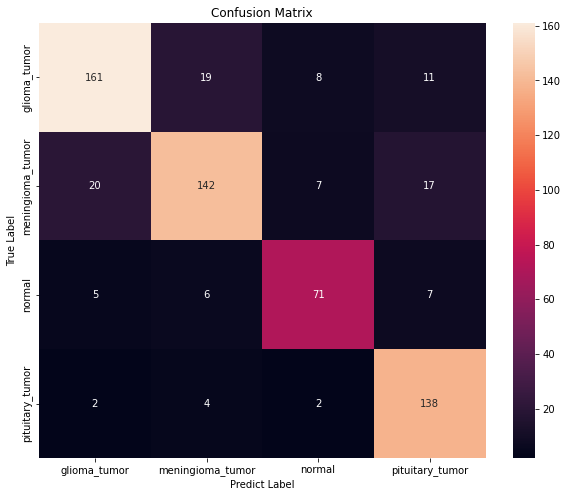

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predict Label')
plt.ylabel('True Label');

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [31]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 1.22757718e-01, -9.00790188e-03,  1.78420454e-01,
            1.59716960e-02,  3.71885905e-03,  6.07718006e-02,
           -1.31402865e-01,  4.88928482e-02,  7.80969709e-02,
            4.04351577e-02, -1.53319061e-01, -1.30818263e-01,
            5.69834448e-02, -6.98417723e-02,  2.87779626e-02,
           -1.01820543e-01, -2.60463580e-02,  4.35059629e-02,
           -3.91048528e-02,  8.51598233e-02,  9.81592610e-02,
           -3.48331183e-02,  8.62980187e-02, -7.88079873e-02,
            9.01520252e-02, -1.26711860e-01,  2.31221877e-02,
            1.41859189e-01,  1.59930259e-01, -4.65773232e-02,
           -5.38572222e-02, -7.01959357e-02],
          [-5.84268989e-03, -1.03790700e-01,  1.19685620e-01,
            7.36903772e-02,  1.49656877e-01,  8.18651095e-02,
            5.80871105e-02, -3.76804098e-02,  1.46102607e-02,
            1.31230742e-01, -2.23692898e-02, -1.38519481e-01,
            